# Importing all necessary libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Load Data

In [2]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain'
        ,'capital-loss','hours-per-week','native-country','income']

In [3]:
training_dir='input/adult.data'
testing_dir='input/incomeTest.csv'

In [4]:
data=pd.read_csv(training_dir,names=columns)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Cleaning

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

处理‘?’

In [10]:
(data.workclass==' ?').sum()/len(data)*100

5.638647461687294

In [11]:
data.workclass.replace(' ?',data.workclass.mode()[0],inplace=True)

In [12]:
data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

'Never-worked'和'Without-pay'是一样的

In [13]:
data.workclass.replace(' Never-worked',' Without-pay',inplace=True)

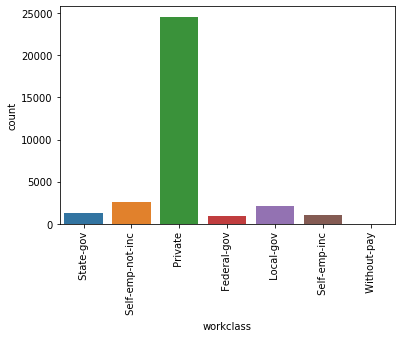

In [14]:
plt.xticks(rotation=90)
sns.countplot(data.workclass)

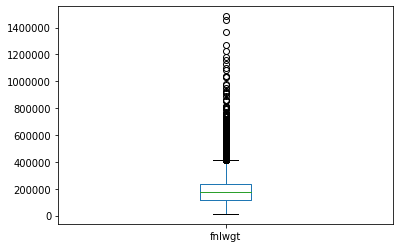

In [15]:
data.fnlwgt.plot(kind='box')

In [16]:
data=data[data.fnlwgt<800000]

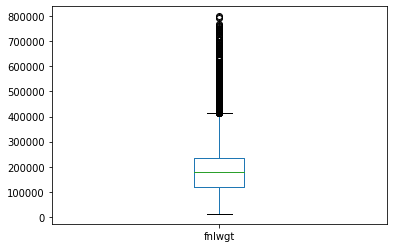

In [17]:
data.fnlwgt.plot(kind='box')

education和education_num是一样的，删掉education

In [18]:
data.drop(['education'],axis=1,inplace=True)

In [19]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

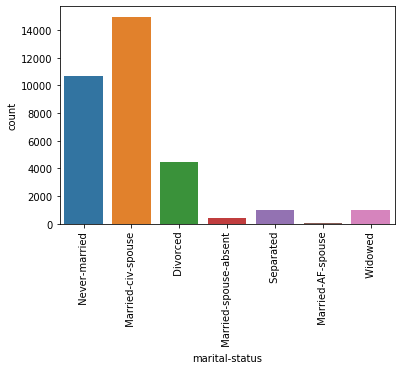

In [20]:
plt.xticks(rotation=90)
sns.countplot(data['marital-status'])

In [21]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

处理'?'

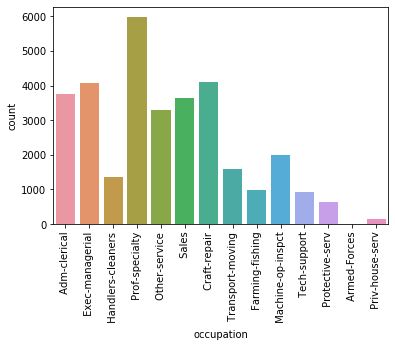

In [22]:
data.occupation.replace(' ?',data.occupation.mode()[0],inplace=True)
plt.xticks(rotation=90)
sns.countplot(data.occupation)

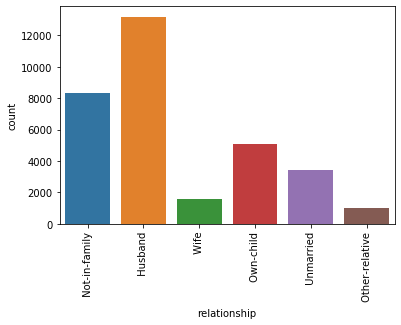

In [23]:
plt.xticks(rotation=90)
sns.countplot(data.relationship)

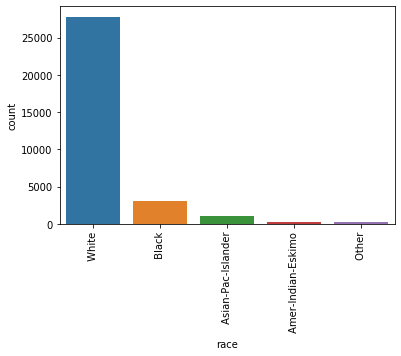

In [24]:
plt.xticks(rotation=90)
sns.countplot(data.race)

' Amer-Indian-Eskimo'数量少，可以归为Other

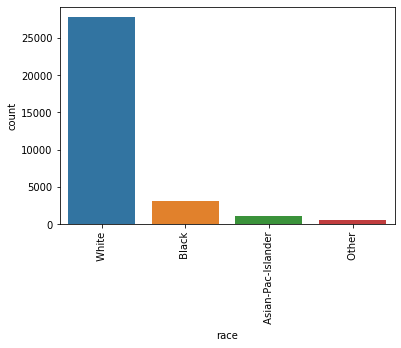

In [25]:
 data['race'].replace(' Amer-Indian-Eskimo',' Other',inplace=True)
plt.xticks(rotation=90)
sns.countplot(data.race)

# Analyse Data

Text(0, 0.5, 'percentage of income categ')

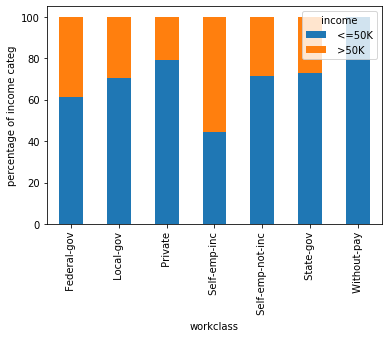

In [26]:
diff_categ_count=data['workclass'].value_counts()
group_table=data.groupby(['workclass','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

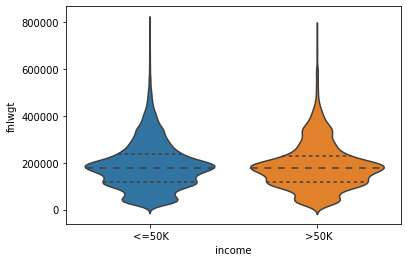

In [27]:
sns.violinplot(data['income'],data['fnlwgt'],inner='quart')

In [28]:
data['income']=data['income'].map({' <=50K': 0, ' >50K': 1})
data['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32532, dtype: int64

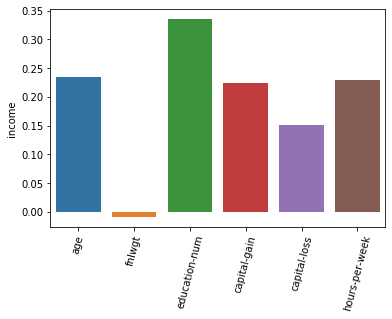

In [29]:
plt.xticks(rotation=75)
sns.barplot(data.corr().index[:-1],data.corr()['income'][:-1])

fnlwgt和income没有相关度很低

In [30]:
data['income']=data['income'].map({0:' <=50K', 1:' >50K'})

In [31]:
data.drop(['fnlwgt'],axis=1,inplace=True)

Text(0, 0.5, 'percentage of income categ')

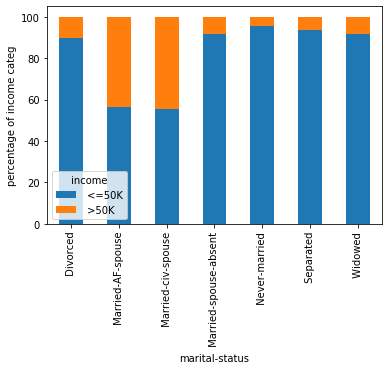

In [32]:
diff_categ_count=data['marital-status'].value_counts()
group_table=data.groupby(['marital-status','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [33]:
data.replace(' Married-civ-spouse',' Married-AF-spouse',inplace=True)
data.replace(' Married-spouse-absent',' Widowed',inplace=True)

Text(0, 0.5, 'percentage of income categ')

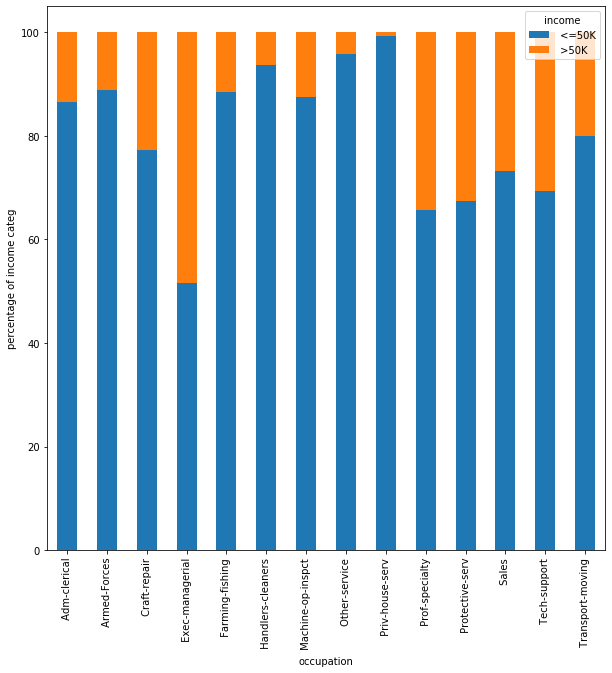

In [34]:
diff_categ_count=data['occupation'].value_counts()
group_table=data.groupby(['occupation','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True,figsize=(10,10))
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

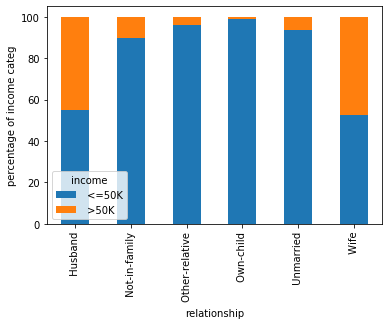

In [35]:
diff_categ_count=data['relationship'].value_counts()
group_table=data.groupby(['relationship','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

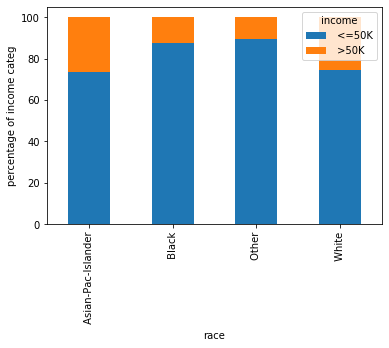

In [36]:
diff_categ_count=data['race'].value_counts()
group_table=data.groupby(['race','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0, 0.5, 'percentage of income categ')

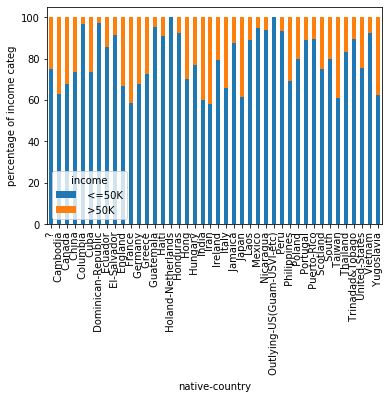

In [37]:
diff_categ_count=data['native-country'].value_counts()
group_table=data.groupby(['native-country','income']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [38]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-AF-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-AF-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-AF-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Feature Engineer

In [39]:
columns_to_encoding = [ 'workclass', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex' ]

columns_to_normalize = [ 'age', 'education-num', 'hours-per-week',
                         'capital-gain', 'capital-loss' ]

In [40]:
le = LabelEncoder()
scaler = StandardScaler()
pl = PolynomialFeatures(2, include_bias=False)

In [41]:
df = data
df.drop(['native-country'], axis=1, inplace=True)

In [42]:
X=df[df.columns.drop('income')].copy()
Y=df['income']

In [43]:
for column in columns_to_encoding:
    X[column]=le.fit_transform(X[column])

In [44]:
X_temp=scaler.fit_transform(pl.fit_transform(X[columns_to_normalize]))
X.drop(columns_to_normalize, axis=1, inplace=True)
X=pd.get_dummies(X,columns=X.columns)
X = np.hstack((X.values, X_temp))                        

In [45]:
Y=le.fit_transform(Y)

# Modeling

In [46]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=7)

In [47]:
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'F1_Score': make_scorer(fbeta_score, beta=1),
}


## 随机森林用GridSearchCV参数调优

In [69]:
tree_param_grid = { 'min_samples_split': list((5,10,15,20,25)),'n_estimators':list((50,100,250))}
grid = GridSearchCV(RandomForestClassifier(max_features='auto'),param_grid=tree_param_grid, n_jobs=-1,
                                   cv=StratifiedKFold(n_splits=10, shuffle=True),scoring=scoring,refit='F1_Score')
grid.fit(train_x, train_y)
print('accuracy on training data:',grid.score(train_x,train_y))

accuracy on training data: 0.7864560607382843


In [70]:
predicted_y=grid.predict(test_x)
print(classification_report(test_y,predicted_y))
print('accuracy_score is on test data: ',accuracy_score(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4911
           1       0.76      0.60      0.67      1596

    accuracy                           0.86      6507
   macro avg       0.82      0.77      0.79      6507
weighted avg       0.85      0.86      0.85      6507

accuracy_score is on test data:  0.855386506838789


## xgboost用RandomizedSearchCV参数调优

In [50]:
param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,1,10),
        'subsample':np.linspace(0.7,0.9,10),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1),
}

random = RandomizedSearchCV(XGBClassifier(tree_method='gpu_hist'), param_dist,
                                   scoring=scoring, n_jobs=-1,
                                   cv=StratifiedKFold(n_splits=10, shuffle=True),
                                   refit='F1_Score',n_iter=100)

In [60]:
random.fit(train_x, train_y)
print('accuracy on training data:',random.score(train_x,train_y))
predicted_y=random.predict(test_x)
print(classification_report(test_y,predicted_y))
print('accuracy_score is on test data: ',accuracy_score(test_y,predicted_y))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy on training data: 0.7617238103463165
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4911
           1       0.76      0.64      0.69      1596

    accuracy                           0.86      6507
   macro avg       0.82      0.79      0.80      6507
weighted avg       0.86      0.86      0.86      6507

accuracy_score is on test data:  0.8619947748578454


## Logistic回归用RandomizedSearchCV参数调优

In [61]:
import scipy
tuned_parameters={'C':scipy.stats.expon(scale=100),
                  'multi_class':['ovr','multinomial']}

search_cv = RandomizedSearchCV(LogisticRegression(penalty='l2',solver='lbfgs',tol=1e-6,max_iter=200), tuned_parameters,
                                   scoring=scoring, n_jobs=-1,
                                   cv=StratifiedKFold(n_splits=10, shuffle=True),
                                   refit='F1_Score',n_iter=100)
search_cv.fit(train_x, train_y)
print('accuracy on training data:',search_cv.score(train_x,train_y))

accuracy on training data: 0.6735751295336788


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
predicted_y=search_cv.predict(test_x)
print(classification_report(test_y,predicted_y))
print('accuracy_score is on test data: ',accuracy_score(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4911
           1       0.74      0.59      0.66      1596

    accuracy                           0.85      6507
   macro avg       0.81      0.76      0.78      6507
weighted avg       0.84      0.85      0.84      6507

accuracy_score is on test data:  0.8492392807745505


# Prediction

In [71]:
testing_data=pd.read_csv(testing_dir).set_index('id')

In [72]:
testing_data.workclass.replace(' ?',data.workclass.mode()[0],inplace=True)
testing_data.workclass.replace(' Never-worked',' Without-pay',inplace=True)
testing_data.drop(['education'],axis=1,inplace=True)
testing_data.occupation.replace(' ?',data.occupation.mode()[0],inplace=True)
testing_data['race'].replace(' Amer-Indian-Eskimo',' Other',inplace=True)
testing_data.drop(['fnlwgt'],axis=1,inplace=True)
testing_data.replace(' Married-civ-spouse',' Married-AF-spouse',inplace=True)
testing_data.replace(' Married-spouse-absent',' Widowed',inplace=True)
testing_data.drop(['native-country'], axis=1, inplace=True)

In [73]:
for column in columns_to_encoding:
    testing_data[column]=le.fit_transform(testing_data[column])
    
testing_temp=scaler.fit_transform(pl.fit_transform(testing_data[columns_to_normalize]))
testing_data.drop(columns_to_normalize, axis=1, inplace=True)
testing_data=pd.get_dummies(testing_data,columns=testing_data.columns)
testing_data = np.hstack((testing_data.values, testing_temp))                        

In [74]:
predicted_data=search_cv.predict(testing_data)

In [75]:
le.fit([' <=50K',' >50K'])

LabelEncoder()

In [76]:
pd.DataFrame({'id':list(range(1,predicted_data.shape[0]+1)),'label':le.inverse_transform(predicted_data)}).to_csv("result.csv",index=False,sep=',')